## Model Features

The Keras model has a lot of features which are well documented at [keras.io](https://keras.io/).

It is helpful to visualize the model structure and how data moves through it. 


### Visualization Methods

**summary ( )** provides a summary of the model showing all of the layers in sequence, the layer type, shape of the data the layer produces, and the number of trainable parameters in the layer. Can be very useful to ensure we are building the model we expect. The number of trainable parameters is a key metric for determining the complexity of your model.


**Plot_model ( )** produces a graphical depiction of the model hierarchy, showing each layer and the connections between layers. It creates a graphical file that can be used in presentations and included in documents. 



![Visualization](Images/03_04.jpg) 

In [ ]:
model = Sequential()

model.add(Dense(4, input_shape=(2,), activation='tanh', name='Hidden-1'))
model.add(Dense(4, activation='tanh', name='Hidden-2'))
model.add(Dense(1, activation='sigmoid', name='Output_layer'))

model.summary()

# Compile and fit the model
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

model.fit(X_train, y_train, epochs=100, verbose=0)

![Visualization](Images/03_05.jpg) 

**Plot_model** creates a .png file. It shows a graphical display of the model from input to output. Also shows each layer type and the shape of the input and the output data.

![Plot_model](Images/03_06.jpg) 

-------


### Callback Functions

At key points in the training process, a Keras model can call functions that have access to the inner state and statistics of the model.

Keras has an API that allows developers to create their own callbacks. 



![Callbacks](Images/03_07.jpg) 

-----

#### Adding an early stopping callback to our model

This callback will stop the training when the parameter we specify stops improving. This lets us specify that the training should run for a large number of epochs and have the model terminate itself if the parameter stops improving. 

The patience parameter=5 signifies that if we do not see the validation accuracy ("real world accuracy") of this set proven for 5 consecutive epochs, the training should stop.

Having a list of callbacks makes it easy to have multiple callbacks.

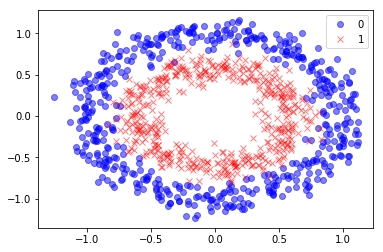

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden-1 (Dense)             (None, 4)                 12        
_________________________________________________________________
Hidden-2 (Dense)             (None, 4)                 20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 5         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________
Train on 700 samples, validate on 300 samples
Epoch 1/100
700/700 [==============================] - 0s 662us/step - loss: 0.6916 - acc: 0.5286 - val_loss: 0.6794 - val_acc: 0.5633
Epoch 2/100
700/700 [==============================] - 0s 65us/step - loss: 0.6671 - acc: 0.6100 - val_loss: 0.6626 - val_acc: 0.5767
Epoch 3/100
700/700 [==============================] - 0s 63us/step - loss: 0.6288 - acc: 0.634

In [3]:
import os

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import plot_model
from keras.callbacks import EarlyStopping

os.environ['TF_CPP_MIN_LOG_LEVEL']='2'


def plot_data(pl, X, y):
    pl.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
    pl.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
    pl.legend(['0', '1'])
    return pl

def plot_decision_boundary(model, X, y):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    c = model.predict(ab)
    Z = c.reshape(aa.shape)
    plt.figure(figsize=(12, 8))
    plt.contourf(aa, bb, Z, cmap='bwr', alpha=0.2)
    plot_data(plt, X, y)
    return plt

X, y = make_circles(n_samples=1000, factor=.6, noise=0.1, random_state=42)
pl = plot_data(plt, X, y)
pl.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = Sequential()
model.add(Dense(4, input_shape=(2, ), activation='tanh', name='Hidden-1'))
model.add(Dense(4, activation='tanh', name='Hidden-2'))
model.add(Dense(1, activation='sigmoid', name='output_layer'))
model.summary()

model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])


# Defining early stopping callback
early_callback = [EarlyStopping(monitor='val_acc', patience=5, mode='max')]

model.fit(X_train, y_train, epochs=100, verbose=1, callbacks=early_callback, validation_data=(X_test, y_test))

300/300 [==============================] - 0s 26us/step


Test Loss:  0.12009670774141948 
Test Accuracy:  0.9566666666666667


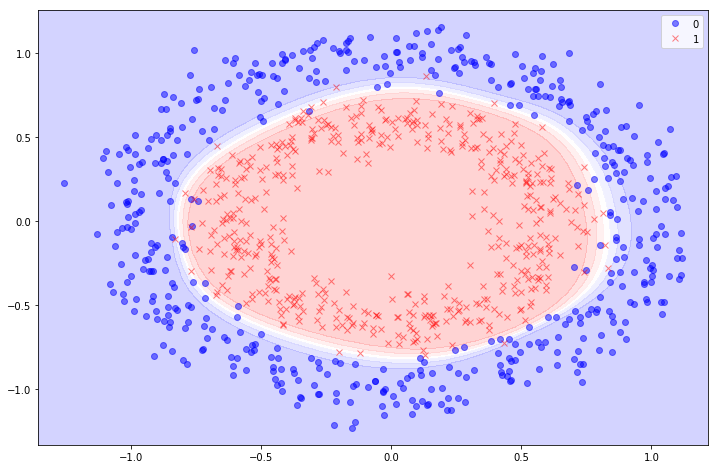

In [4]:
eval_result = model.evaluate(X_test, y_test)
print("\n\nTest Loss: ", eval_result[0], "\nTest Accuracy: ", eval_result[1])

plot_decision_boundary(model, X, y).show()

--------

### Saving and Restoring



Can use .save and .load_model to save our trained model and later restore our trained model in a service or applications to make predictions on new data. 

![Save](Images/03_08.jpg) 



.model_to_json and .model_to_yaml will just save the layer structural architecture without weights or compile settings to a JSON or yaml string. 

.model_from_json and .model_from_yaml create a new model with the layer structure from the passed JSON or yaml string, ready to be compiled and trained.

Both yaml and JSON are human readable strings, so you can use these to inspect and alter the architecture of the model by changing layers. 

![json_yaml](Images/03_09.jpg) 

.save_weights saves just the model's current weights to an HDF5 file. 

.load_weights restores the weights from the contents of an HDF5 file. This assumes the architecture of the model is the same.

With .load_weights we can specify the byname=True parameter to load the weights into layers with the matching name, regardless of whether the architecture is the same.


![save_weights](Images/03_10.jpg) 